# LAB 8 : Classification

  1. Support Vector Machines 
  2. K-Nearest Neighbors
  3. Classification on MNIST Digit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Support Vector Machines (SVM)



1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$



Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


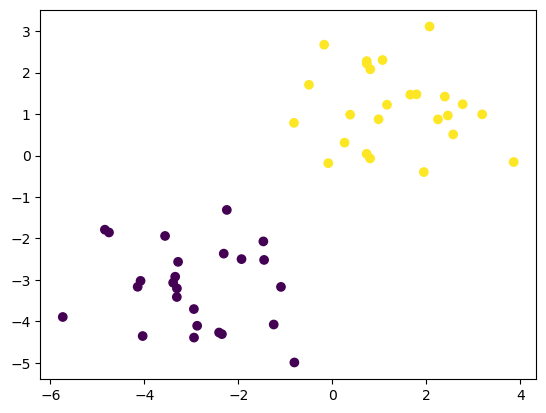

In [3]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

plt.show()

Create a data dictionary, which contains both label and data points.

In [4]:
positiveX=[]
negativeX=[]

## Write your code here
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        positiveX.append(X[i])

#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(positiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [5]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):
  # insert your code here
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    w_b = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
        
    all_data = []
    for yi in data_dict:
      for X in data_dict[yi]:
        for xi in X:
          all_data.append(xi)
    maximum = np.max(all_data)
    all_data = None

    lr = [maximum * 0.1,maximum * 0.01,maximum * 0.001,]
    b_init = 2
    b_multiple = 5
    w_optimum = maximum*0.5                      
    
    for step in lr:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(maximum*b_init), maximum*b_init, step*b_multiple):
                for tx in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*tx
                    classified = True
                     # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                classified = False
                                
                    if classified:
                        w_b[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - step  
        norms = sorted([n for n in w_b])
        
        min_length = w_b[norms[0]]
        w = min_length[0]
        b = min_length[1]                  
    return w,b


**Training**

In [6]:
# All the required variables 
w=[] # Weights 2 dimensional vector
b=[] # Bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.61728432 0.61728432]
1.1766982356147064


## Visualization of the SVM separating hyperplanes (after training)

In [7]:
def visualize(data_dict):
       
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

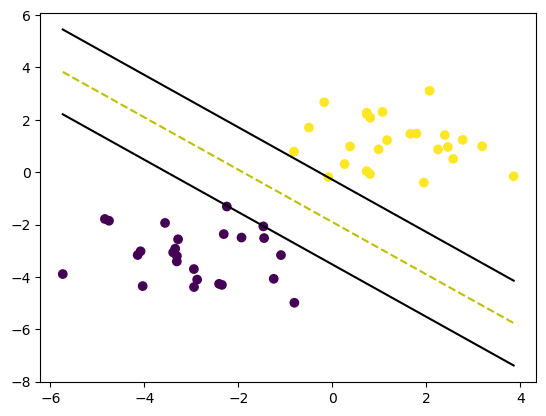

In [8]:
fig = plt.figure()
visualize(data_dict)

**Testing**

In [9]:
def predict(data,w,b):
  y_pred = np.sign(data@w.T + b)## write your code here
  return y_pred

test accuracy= 100.0


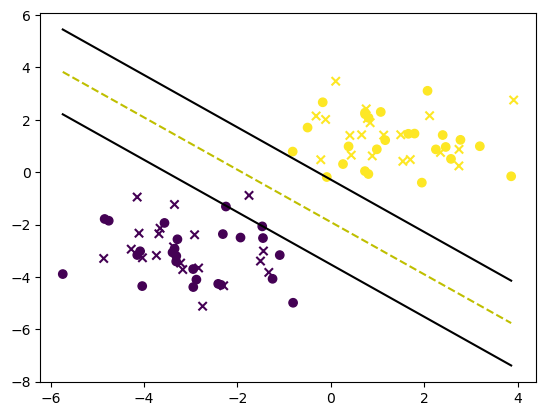

In [10]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
# print(y_gr)
# evaluate with the trained model

y_pred = predict(test_data,w,b)
# print(y_pred)

tp=0
fp=0
for i in range(len(test_data)):
  if y_gr[i]==y_pred[i]:
    tp+=1
  else:
    fp+=1

accuracy =(tp/(tp+fp))*100   # Write your code here
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)
plt.show()

**Use the Sci-kit Learn Package and perform Classification on the above dataset using the SVM algorithm**

1.0

 Confusion Matrix :  [[20  0]
 [ 0 20]]


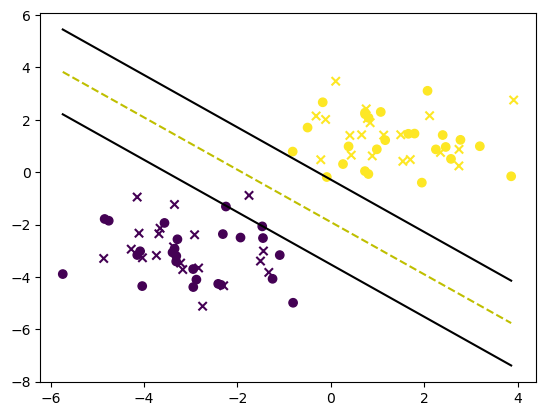

In [11]:
## Write your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

SVM = LinearSVC()
SVM.fit(X, y)
predicted = SVM.predict(test_data)
score = SVM.score(test_data, y_gr)
print(score)
cm = metrics.confusion_matrix(y_gr, predicted)
print('\n Confusion Matrix : ',cm)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=predicted)
plt.show()

# K-Nearest Neighbours (KNN)

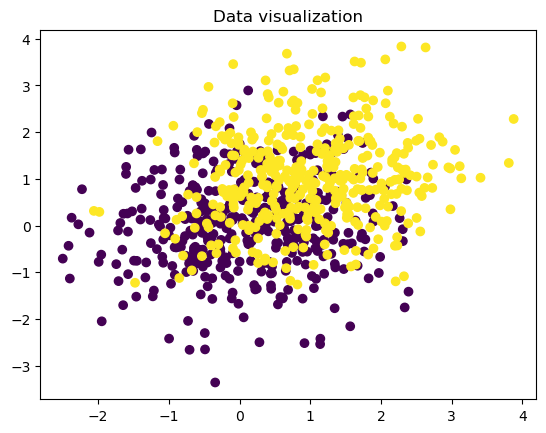

In [12]:
import numpy as np
import operator
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

# print(data_train.shape)
# print(label.shape)
plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')
plt.show()

In [13]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [14]:
def get_neighbors(train,label_train, test_row, num_neighbors):
  ## write your code here
  # print('inside getneighbors',len(train[1]))
  distances = []
  for x in range(train.shape[0]):
    # print('iteraton no; ',x+1)
    dist = euclidean_distance(test_row, train[x])
    distances.append((train[x], dist,label_train[x]))
  distances.sort(key = lambda x: x[1])
  neighbors = []
  for x in range(num_neighbors):
    # print('shape of distance matrix',np.shape(distances))
    neighbors.append(distances[x])
  return neighbors


In [15]:
def predict_classification(neighbors):
  ## write your code here
  # prediction=-123456789
  neg_cls=0
  pos_cls=0
  # print(np.shape(neighbors))
  neighbors=np.asarray(neighbors)
  for i in range(len(neighbors)):
    if neighbors[i][2]==0:
      neg_cls+=1
    else:
      pos_cls+=1
  if neg_cls>pos_cls:
    prediction=0
  else:
    prediction=1 
  return prediction
  

In [16]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))
print(data_test.shape)
print(label_test.shape)

(200, 2)
(200,)


In [17]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

Testing Accuracy= 65.5 %


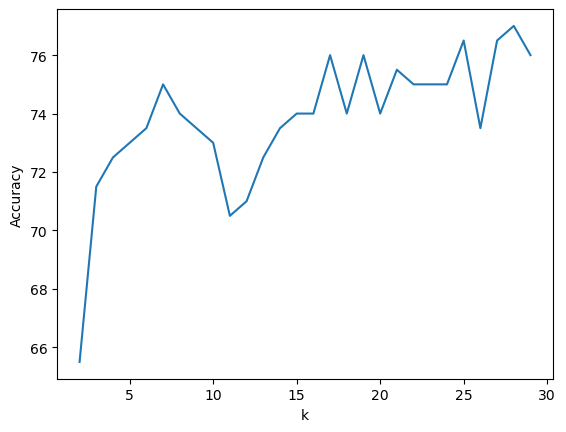

In [18]:
K=2

pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label, data_test[i,:], K)
  # print(neig[-1])
  pred_label[i]=predict_classification(neig)
# print(pred_label)
# print(label_test)
accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')

k_sp=np.arange(2,30)
# print(k_sp)
accu_gr=[]
for j in k_sp:
  # print(j)
  pred_label=np.zeros(data_test.shape[0])
  for i in range(data_test.shape[0]):
    neig=get_neighbors(data_train,label, data_test[i,:], j)
    pred_label[i]=predict_classification(neig)
  accu_gr.append((len(np.where(pred_label==label_test)[0])/len(label_test))*100)


plt.plot(k_sp,accu_gr)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

**Use the Sci-kit Learn Package and perform Classification on the above dataset using the K-Nearest Neighbour algorithm**

/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

0.655

 Confusion Matrix :  [[87 13]
 [56 44]]


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

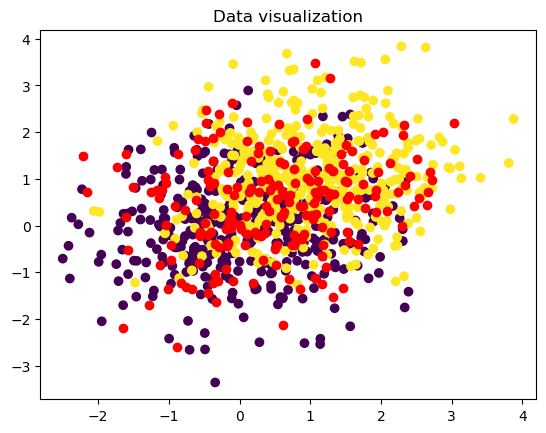

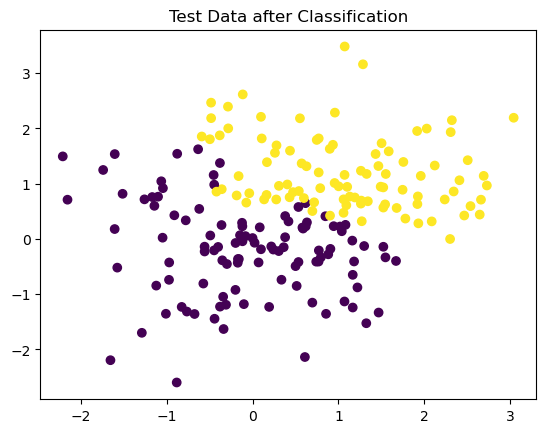

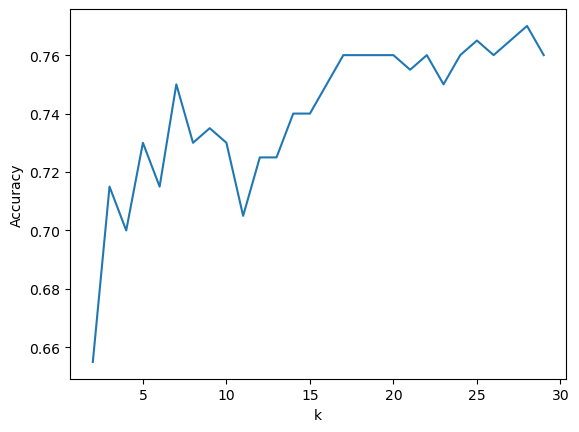

In [19]:
## Write your code here
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(data_train,label)
predicted=KNN.predict(data_test)
score = KNN.score(data_test, label_test)
print(score)
cm = metrics.confusion_matrix(label_test, predicted)
print('\n Confusion Matrix : ',cm)

k_sp=np.arange(2,30)
score=[]
for k in k_sp:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(data_train,label)
  predicted=KNN.predict(data_test)
  score.append(KNN.score(data_test, label_test))


plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.scatter(data_test[:,0],data_test[:,1],c='r')
plt.title('Data visualization')
plt.show()

plt.figure()
plt.scatter(data_test[:,0],data_test[:,1],c=predicted)
plt.title('Test Data after Classification')
plt.show()

plt.figure()
plt.plot(k_sp,score)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Classification on MNIST Digit Data

1. Read MNIST data and perform train-test split
2. Select any 2 Classes and perform classification task using SVM, KNN and Logistic Regression algorithms with the help of Sci-Kit Learn tool
3. Report the train and test accuracy and also display the results using confusion matrix
4. Repeat steps 2 and 3 for all 10 Classes and tabulate the results

In [21]:
## Write your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgmHUOC3JtpGvrrspbHwrKl31PjC9XYECeah2-_LJkmjjtGcQp3YKA


In [24]:
# !pip install idx2numpy
# import idx2numpy
# from keras.utils import np_utils

In [25]:
img_path = './lab_files/Lab_08/t10k-images-idx3-ubyte'## write your code here
label_path = './lab_files/Lab_08/t10k-labels-idx1-ubyte'## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)
print(Images.shape)

index1=np.where(labels==4)
ind1=index1[0]
images1=Images[ind1,:,:]
labcl1=labels[ind1]

index2=np.where(labels==7)
ind2=index2[0]
images2=Images[ind2,:,:]
labcl2=labels[ind2]


data=np.concatenate((images1,images2))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((labcl1,labcl2))
print(G_lab.shape)

(10000, 28, 28)
(2010, 784)
(2010,)


In [26]:
train_img, test_img, train_lbl, test_lbl = train_test_split(data, G_lab,
                                                            test_size=0.2, random_state=0)

In [27]:
logi_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
logi_reg.fit(train_img, train_lbl)
Prediction = logi_reg.predict(test_img)
score = logi_reg.score(test_img, test_lbl)
print(score)
score_train = logi_reg.score(train_img, train_lbl)
print(score_train)
cm = metrics.confusion_matrix(test_lbl, Prediction)
print('\n Confusion Matrix : ',cm)

0.9975124378109452
1.0

 Confusion Matrix :  [[199   0]
 [  1 202]]


In [28]:
# param_C = 5
# param_gamma = 0.05
SVM = LinearSVC()
SVM.fit(train_img, train_lbl)
predicted = SVM.predict(test_img)
score = SVM.score(test_img, test_lbl)
print(score)
score_train = SVM.score(train_img, train_lbl)
print(score_train)
cm = metrics.confusion_matrix(test_lbl, predicted)
print('\n Confusion Matrix : ',cm)

0.9925373134328358
1.0

 Confusion Matrix :  [[197   2]
 [  1 202]]


In [29]:
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(train_img,train_lbl)
predicted=KNN.predict(test_img)
score = KNN.score(test_img, test_lbl)
print(score)
score_train = KNN.score(train_img, train_lbl)
print(score_train)
cm = metrics.confusion_matrix(test_lbl, predicted)
print('\n Confusion Matrix : ',cm)

0.9950248756218906
0.9975124378109452

 Confusion Matrix :  [[198   1]
 [  1 202]]


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

In [30]:
print(Images.shape)
images=np.reshape(Images,(Images.shape[0],Images.shape[1]*Images.shape[2]))
train_img, test_img, train_lbl, test_lbl = train_test_split(images, labels,
                                                            test_size=0.2, random_state=0)
logi_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors = 5)

train_img=train_img/255
logi_reg.fit(train_img, train_lbl)
SVM.fit(train_img, train_lbl)
KNN.fit(train_img,train_lbl)

Prediction_LC = logi_reg.predict(test_img)
prediction_SVM = SVM.predict(test_img)
prediction_KNN=KNN.predict(test_img)

test_score_LC = logi_reg.score(test_img, test_lbl)
test_score_SVM = SVM.score(test_img, test_lbl)
test_score_KNN = KNN.score(test_img, test_lbl)

train_score_LC = logi_reg.score(train_img, train_lbl)
train_score_SVM = SVM.score(train_img, train_lbl)
train_score_KNN = KNN.score(train_img, train_lbl)

cm_LC = metrics.confusion_matrix(test_lbl, Prediction_LC)
cm_SVM = metrics.confusion_matrix(test_lbl, prediction_SVM)
cm_KNN = metrics.confusion_matrix(test_lbl, prediction_KNN)

from tabulate import tabulate
print(tabulate([['Test score',test_score_LC,test_score_SVM,test_score_KNN], ['Train score', train_score_LC,train_score_SVM,train_score_KNN],['Confusion matrix',cm_LC,cm_SVM,cm_KNN]], headers=['parameters', 'Logistic classifier ','Support Vector Machine','K Nearest Neighbors']))

(10000, 28, 28)


/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/girish/miniconda3/envs/bathy/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it

ModuleNotFoundError: No module named 'tabulate'

**Note : If you are interested, also try classifying MNIST digit data using the code you have written for SVM, KNN and Logistic Regression** 

  

In [31]:
def predict_classification_mnist(neighbors):
  ## write your code here
  neighbors=np.asarray(neighbors)
  # lbl_digit=np.unique(neighbors[:,2])
  # print(lbl_digit)
  neg_cls=0
  pos_cls=0
  # print(np.shape(neighbors))
  
  for i in range(len(neighbors)):
    if neighbors[i][2]==4:
      neg_cls+=1
    else:
      pos_cls+=1
  if neg_cls>pos_cls:
    prediction=4
  else:
    prediction=7
  return prediction

Testing Accuracy= 99.50248756218906 %


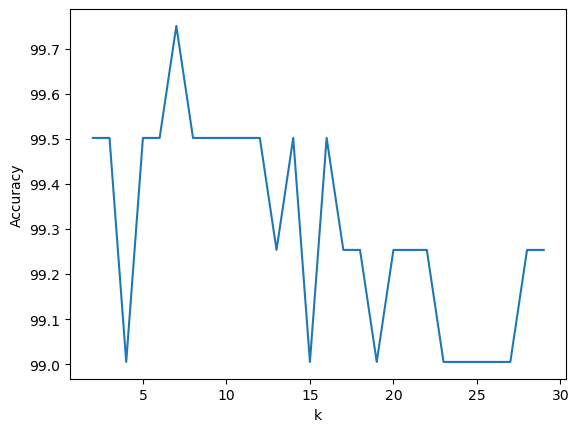

In [32]:
train_img, test_img, train_lbl, test_lbl = train_test_split(data, G_lab,
                                                            test_size=0.2, random_state=0)
train_img=train_img/255
test_img=test_img/255
K=3

pred_label=np.zeros(test_img.shape[0])
for i in range(test_img.shape[0]):
  neig=get_neighbors(train_img,train_lbl, test_img[i,:], K)
  # print(neig[-1])
  pred_label[i]=predict_classification_mnist(neig)
# print(pred_label)
# print(test_lbl)
accuracy=(len(np.where(pred_label==test_lbl)[0])/len(test_lbl))*100
print('Testing Accuracy=',accuracy,'%')

k_sp=np.arange(2,30)
# print(k_sp)
accu_gr=[]
for j in k_sp:
  # print(j)
  pred_label=np.zeros(test_img.shape[0])
  for i in range(test_img.shape[0]):
    neig=get_neighbors(train_img,train_lbl, test_img[i,:], j)
    pred_label[i]=predict_classification_mnist(neig)
  accu_gr.append((len(np.where(pred_label==test_lbl)[0])/len(test_lbl))*100)


plt.plot(k_sp,accu_gr)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()